In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4 MB 7.1 kB/s 
     |████████████████████████████████| 4.0 MB 35.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.


In [ ]:
# import pandas as pd
import numpy as np
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import *
# resnet34 architecture

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/PROJECT/AI Voice Detector')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/PROJECT/AI Voice Detector'

In [ ]:
# !unzip 'dustbin.zip'

In [ ]:
root_path = 'train_data_spectogram'

In [ ]:
# this will print all the spectogram image file names
for folder in os.listdir(root_path):
    print(f'switched to {folder}')
    for file_name in os.listdir(os.path.join(root_path, folder)):
        path_name = os.path.join(root_path, folder, file_name)
        print(path_name)
    print("=" * 100)

switched to Akshay
train_data_spectogram/Akshay/aiwbfgcu.png
train_data_spectogram/Akshay/alafjwfx.png
train_data_spectogram/Akshay/apuuljzw.png
train_data_spectogram/Akshay/bhqdlvwy.png
train_data_spectogram/Akshay/detokoeu.png
train_data_spectogram/Akshay/dprkrjjd.png
train_data_spectogram/Akshay/dtyhdwfe.png
train_data_spectogram/Akshay/gbmwrofb.png
train_data_spectogram/Akshay/gkmykmlt.png
train_data_spectogram/Akshay/gptvoiyp.png
train_data_spectogram/Akshay/ictkgema.png
train_data_spectogram/Akshay/kkhkbtkk.png
train_data_spectogram/Akshay/llzsefay.png
train_data_spectogram/Akshay/mxezzzqx.png
train_data_spectogram/Akshay/nrceggxl.png
train_data_spectogram/Akshay/oitdvbzk.png
train_data_spectogram/Akshay/olmeljsw.png
train_data_spectogram/Akshay/plgurlzz.png
train_data_spectogram/Akshay/rgbfweuu.png
train_data_spectogram/Akshay/rtjizzky.png
train_data_spectogram/Akshay/rwywuhtg.png
train_data_spectogram/Akshay/scgwjrri.png
train_data_spectogram/Akshay/sjwkakou.png
train_data_spec

In [ ]:
# verifing the images whether it's broken or not
for folder in os.listdir(root_path):
    print(folder)
    verify_images(os.path.join(root_path, folder), delete = True)
    print("=" * 100)

Akshay


Amir


Modi


Salman


Srk


In [ ]:
np.random.seed(47)
data = ImageDataBunch.from_folder(
        root_path, 
        train = '.', 
        valid_pct = 0.2,
        ds_tfms = get_transforms(), 
        size = 224,
    ).normalize(imagenet_stats)

In [ ]:
data.classes

['Akshay', 'Amir', 'Modi', 'Salman', 'Srk']

In [ ]:
# data.train_dl.batch_size = 28
data.train_dl.batch_size

64

In [ ]:
defaults.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
defaults.device

device(type='cuda', index=0)

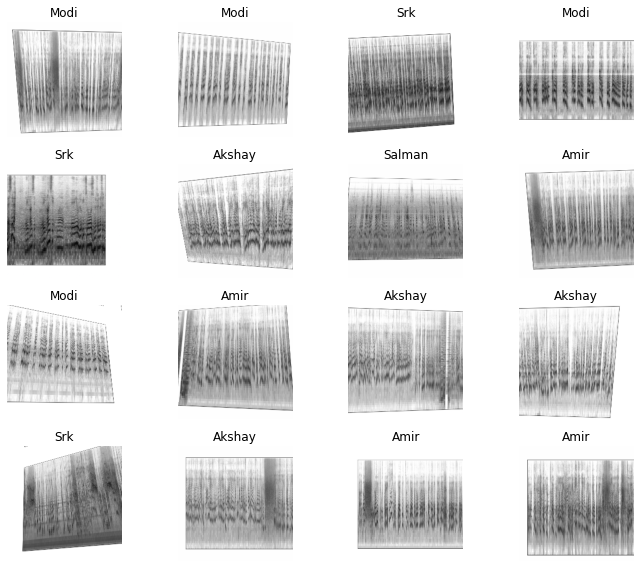

In [ ]:
data.show_batch(rows = 4, figsize = (10, 8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Akshay', 'Amir', 'Modi', 'Salman', 'Srk'], 5, 87, 21)

In [ ]:
learner = create_cnn(data, models.resnet34, metrics = [accuracy, error_rate])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.639563,4.161234,0.190476,0.809524,01:47
1,2.534174,3.733544,0.238095,0.761905,01:46
2,2.547033,3.498799,0.333333,0.666667,01:48
3,2.369542,3.265351,0.333333,0.666667,01:48


In [ ]:
learner.unfreeze()

In [ ]:
# learner.lr_find(num_it = 5)
# learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(10, max_lr = slice(0.5e-4, 0.5e-2))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.771876,2.861602,0.333333,0.666667,01:46
1,1.924496,3.067321,0.333333,0.666667,01:47
2,1.762902,3.446093,0.428571,0.571429,01:47
3,1.608539,4.729501,0.380952,0.619048,01:48
4,1.507525,4.154232,0.523810,0.476190,01:48
5,1.409919,1.478080,0.523810,0.476190,01:48
6,1.319559,0.885286,0.904762,0.095238,01:48
7,1.245151,1.066284,0.857143,0.142857,01:49
8,1.188881,1.084667,0.857143,0.142857,01:50
9,1.122607,1.014637,0.857143,0.142857,01:50


In [ ]:
learner.save('ai-voice-detector')

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learner)
interpretation

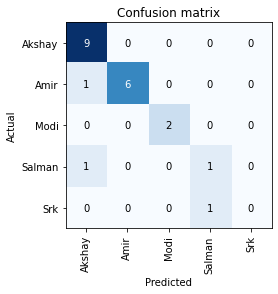

In [ ]:
interpretation.plot_confusion_matrix()

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/PROJECT/AI Voice Detector'

In [ ]:
os.listdir('test_data_spectogram')

['Akshay_spectogram',
 'Amir_spectogram',
 'Modi_spectogram',
 'Salman_spectogram',
 'Srk_spectogram']

In [ ]:
test_path = 'test_data_spectogram'
for folder in os.listdir(test_path):
    for file_name in os.listdir(os.path.join(test_path, folder)):
        path_name = os.path.join(test_path, folder, file_name)
        print(path_name)
        test_image = open_image(path_name)
        result = learner.predict(test_image)
        print(result)
        print(data.classes[np.argmax(result[2])])
    print()

test_data_spectogram/Akshay_spectogram/ahcqxdpz.png
(Category tensor(4), tensor(4), tensor([0.3480, 0.0018, 0.1840, 0.1095, 0.3567]))
Srk
test_data_spectogram/Akshay_spectogram/aoxmbovs.png
(Category tensor(0), tensor(0), tensor([9.8283e-01, 5.6981e-06, 2.0835e-04, 1.2056e-02, 4.8974e-03]))
Akshay
test_data_spectogram/Akshay_spectogram/apqvwwjq.png
(Category tensor(0), tensor(0), tensor([8.6960e-01, 1.2377e-04, 1.2957e-04, 8.3782e-02, 4.6369e-02]))
Akshay
test_data_spectogram/Akshay_spectogram/cwlwmgiy.png
(Category tensor(4), tensor(4), tensor([3.4823e-03, 3.6573e-04, 3.3657e-01, 5.1528e-02, 6.0806e-01]))
Srk
test_data_spectogram/Akshay_spectogram/dbxufomk.png
(Category tensor(0), tensor(0), tensor([8.1572e-01, 1.0703e-06, 2.5961e-03, 1.3521e-01, 4.6477e-02]))
Akshay
test_data_spectogram/Akshay_spectogram/iwkzqbqn.png
(Category tensor(0), tensor(0), tensor([6.1867e-01, 2.4713e-05, 8.4899e-02, 8.6681e-02, 2.0973e-01]))
Akshay
test_data_spectogram/Akshay_spectogram/pupdjwnx.png
(Categor